In [ ]:
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [ ]:
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

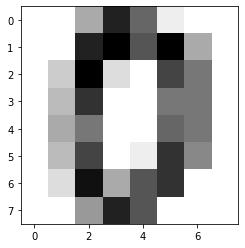

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

digits.data.shape

(1797, 64)

In [ ]:
X_train=digits.data[1:1500]
Y_train=digits.target[1:1500]
X_test=digits.data[1501:1797]
Y_test=digits.target[1501:1797]

## SVC

In [ ]:
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(X_train, Y_train)

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predicted_values=svc.predict(X_test)
print(predicted_values)

[7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8
 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 1 9 0 1 2 3 4 5 6 9 0 1 2 3 4 5 6 7 1 9 4 9
 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 8 3 7 3 3 4 6 6 6 9
 9 1 5 0 9 5 2 8 0 1 7 6 3 2 1 7 9 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1
 7 5 4 4 7 2 2 5 7 8 5 9 4 5 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8
 9 0 1 2 8 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0
 1 2 6 8 8 7 5 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9
 1 7 6 8 4 5 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8]


In [ ]:
print(Y_test)

[7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8
 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 9 0 1 2 3 4 5 6 7 8 9 0 9
 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4
 9 1 5 0 9 5 2 8 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1
 7 5 4 4 7 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8
 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0
 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9
 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8]


In [ ]:
#Comparing the predicted and original values
print('Accuracy score: ',accuracy_score(predicted_values, Y_test))
print(classification_report(predicted_values, Y_test))

Accuracy score:  0.9527027027027027
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.94      0.97        32
           2       1.00      1.00      1.00        27
           3       0.80      1.00      0.89        24
           4       0.91      0.97      0.94        31
           5       1.00      0.91      0.95        33
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.93      0.84      0.88        31
           9       0.94      0.91      0.92        32

    accuracy                           0.95       296
   macro avg       0.95      0.96      0.95       296
weighted avg       0.96      0.95      0.95       296



In [ ]:
file_name = 'digit_model.joblib'
dump(model, file_name)


NameError: ignored

## Logistic Regression

In [ ]:
LR = LogisticRegression (C = 0.01, solver = 'saga')
LR.fit(X_train, Y_train)
Y_LR = LR.predict(X_test)
print('Accuracy score: ',accuracy_score(Y_LR, Y_test))
print(classification_report(Y_LR, Y_test))

Accuracy score:  0.918918918918919
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.83      0.91        36
           2       1.00      1.00      1.00        27
           3       0.67      0.95      0.78        21
           4       0.91      0.97      0.94        31
           5       1.00      0.91      0.95        33
           6       0.97      0.97      0.97        30
           7       0.93      0.93      0.93        30
           8       0.93      0.79      0.85        33
           9       0.87      0.90      0.89        30

    accuracy                           0.92       296
   macro avg       0.92      0.93      0.92       296
weighted avg       0.93      0.92      0.92       296



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
# It is found that Support Vector Classifier worked better for the digits dataset with an overall accuracy score 95.27%.